# Pesquisa: 122 colunas (15 calculadas)
# 5500 respondentes
# Satisfação no trabalho, situação de saúde, dados demográficos

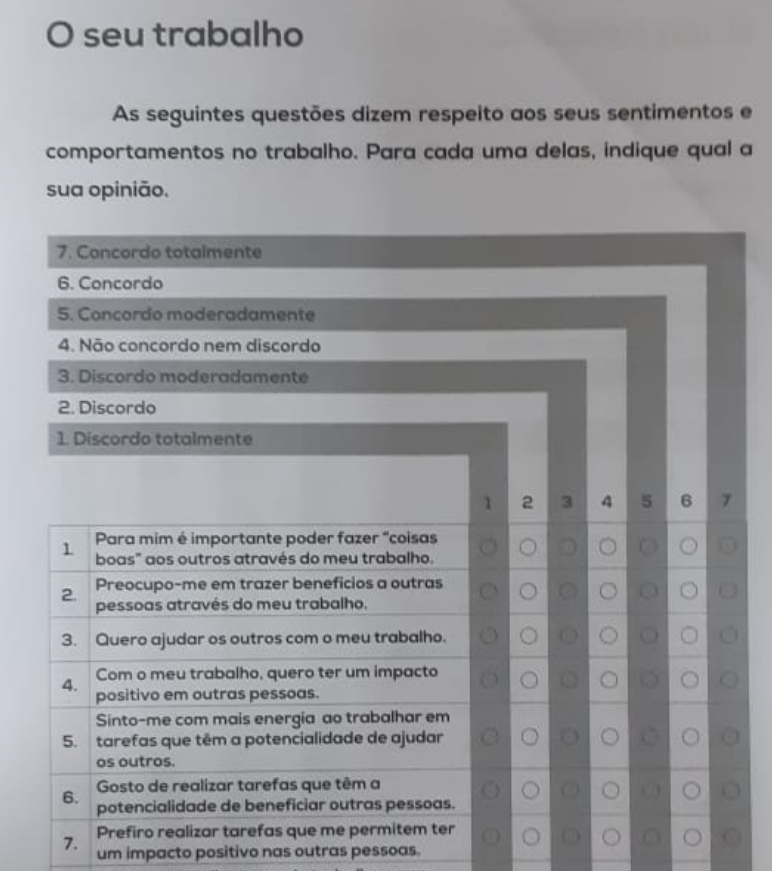

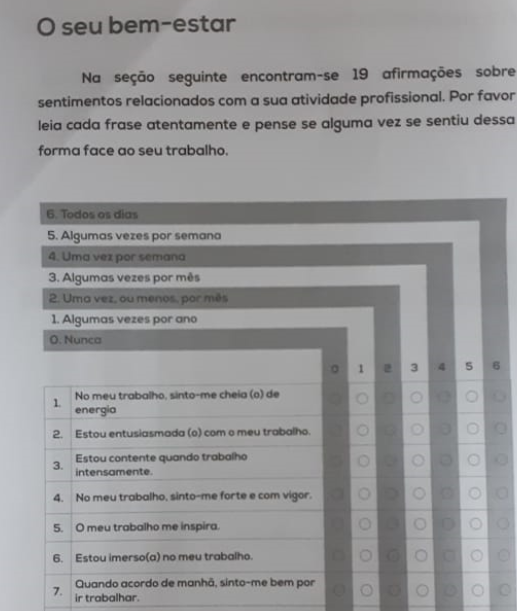

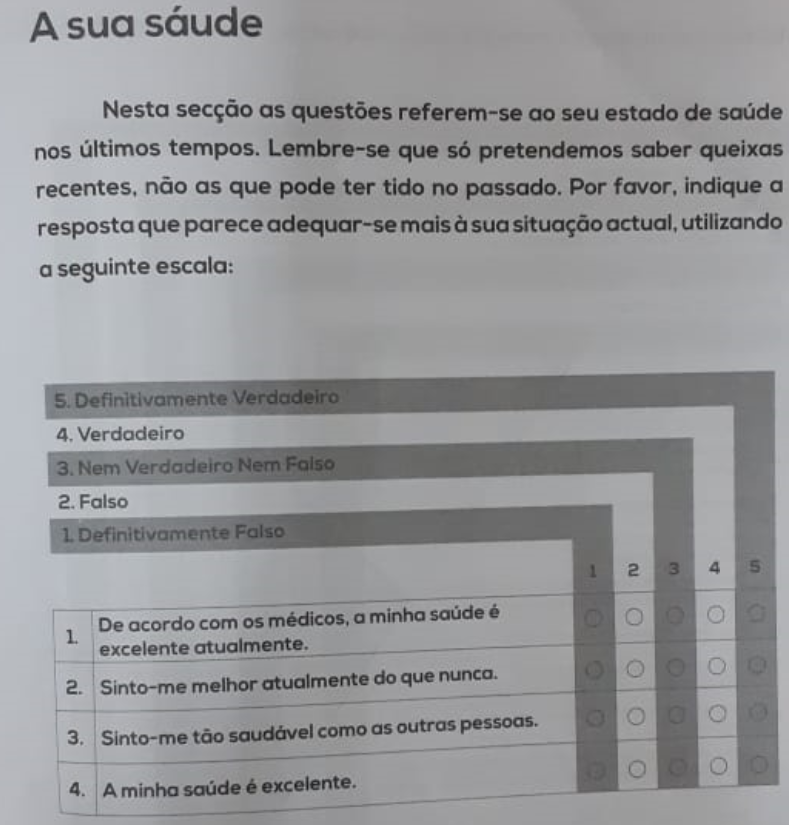

# Análise exploratória e preditiva V1

Problema: Não há consenso na determinação de burnout porque os valores variam conforme a população analisada e o contexto em que ela está inserida. Além disso, como não há mapeamento de burnout como doença nas listagens médicas tradicionais (como o CID-10), há receio da comunidade científica em determinar um diagnóstico. 

Proposta: Sendo assim, proponho fazer experimentos para realizar a predição de burnout como classificação utlizando as faixas de resultados das dimensões cinismo, exaustão e eficácia em três variações: (conforme https://www.tandfonline.com/doi/full/10.1080/2331205X.2016.1237605):
Combinação de exaustão (E) e cinismo (C) altas com eficácia no trabalho (T) baixa.
(E) alta e/ou (C) alta.
Escore grave em qualquer uma das três dimensões.
Para determinar um escore grave posso utilizar como critério:
* Estar acima da média do escore.
* Estar com 1 desvio padrão acima da média do escore (se a distribuição dos escores for gaussiana).
* Estar acima do terceiro quartil do intervalo do escore.

Desta forma, o nosso trabalho poderá ser usado para responder às perguntas:

É possível realizar a predição de burnout como um problema de classificação (no contexto da pesquisa do Prof Carlos)? Qual das combinações gera o melhor resultado?

Além disso, como complemento, podemos responder também às perguntas:

Há correlação entre as três dimensões que caracterizam burnout?
Quais são os sumarizadores (MPS, IPPS, IOPS, etc.) que mais contribuem para fazer a predição de burnout?
Quais outros fatores são comuns para indivíduos classificados com burnout positivo (escola, faixa etária, gênero, etc.)?


In [1]:
# Importa as bibliotecas para análise exploratória

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Como os valores nulos estão representados?
na_vals = ['#NULO!']

# Ler as tabelas de respostas
df = pd.read_csv('Base 5_T1_VV.csv', sep=';', na_values=na_vals, decimal=",")
df2 = pd.read_csv('Base 5_T2_VV_Sem_2.csv', sep=';', na_values=na_vals, decimal=",")

In [3]:
# As colunas são as mesmas?
set(df.columns) - set(df2.columns)

set()

In [4]:
# Unir as tabelas
df_joined = pd.concat([df, df2], ignore_index=True)

In [5]:
# Qual o tamanho final?
df_joined.shape

(5584, 122)

In [6]:
# Remova linhas em branco
df_joined = df_joined.dropna(axis=0, how='all')

In [7]:
# Qual o tamanho final?
df_joined.shape

(3970, 122)

In [8]:
# Quais são as colunas categóricas?
cat_cols = [idx for idx, val in df_joined.dtypes.items() if val == 'object']

In [111]:
# Descreva estatísticas básicas das colunas categóricas
df_joined[cat_cols].describe()

,Código,Município,Escola_resp_Quest
count,3970,3970,3941
unique,2887,16,287
top,GUCA084,Passo Fundo,Instituto Menino Deus
freq,14,1188,117


In [ ]:
# df_joined.to_csv('df_joined.csv', encoding='iso-8859-1')

In [ ]:
# Reduza respostas complexas à uma palavra que tenha significado no contexto

"""
df_joined.loc[df_joined['Porquê_A'].str.contains("Filh", case=False) == True, 'Porquê_A'] = "Filho"
df_joined.loc[df_joined['Porquê_A'].str.contains("Coluna", case=False) == True, 'Porquê_A'] = "Coluna"
df_joined.loc[df_joined['Porquê_A'].str.contains("Acompanha", case=False) == True, 'Porquê_A'] = "Acompanhamento"
df_joined.loc[df_joined['Porquê_A'].str.contains("Cirurgia", case=False) == True, 'Porquê_A'] = "Cirurgia"
df_joined.loc[df_joined['Porquê_A'].str.contains("Conjuntivite", case=False) == True, 'Porquê_A'] = "Conjuntivite"
df_joined.loc[df_joined['Porquê_A'].str.contains("Consulta", case=False) == True, 'Porquê_A'] = "Consulta"

df_joined.loc[df_joined['Porquê_B'].str.contains("Aborto", case=False) == True, 'Porquê_B'] = "Aborto"
df_joined.loc[df_joined['Porquê_B'].str.contains("Acompanha", case=False) == True, 'Porquê_B'] = "Acompanhamento"
df_joined.loc[df_joined['Porquê_B'].str.contains("Caxumba", case=False) == True, 'Porquê_B'] = "Caxumba"
df_joined.loc[df_joined['Porquê_B'].str.contains("Cirurgia", case=False) == True, 'Porquê_B'] = "Cirurgia"
df_joined.loc[df_joined['Porquê_B'].str.contains("Coluna", case=False) == True, 'Porquê_B'] = "Coluna"
df_joined.loc[df_joined['Porquê_B'].str.contains("Depressão", case=False) == True, 'Porquê_B'] = "Depressão"
df_joined.loc[df_joined['Porquê_B'].str.contains("stress", case=False) == True, 'Porquê_B'] = "Estresse"
df_joined.loc[df_joined['Porquê_B'].str.contains("Filh", case=False) == True, 'Porquê_B'] = "Filho"
df_joined.loc[df_joined['Porquê_B'].str.contains("Fratur", case=False) == True, 'Porquê_B'] = "Fratura"
df_joined.loc[df_joined['Porquê_B'].str.contains("Gripe", case=False) == True, 'Porquê_B'] = "Gripe"
df_joined.loc[df_joined['Porquê_B'].str.contains("Infecção", case=False) == True, 'Porquê_B'] = "Infecção"
df_joined.loc[df_joined['Porquê_B'].str.contains("Labirintite", case=False) == True, 'Porquê_B'] = "Labirintite"
df_joined.loc[df_joined['Porquê_B'].str.contains("Lesão", case=False) == True, 'Porquê_B'] = "Lesão"
df_joined.loc[df_joined['Porquê_B'].str.contains("Licença", case=False) == True, 'Porquê_B'] = "Licença"
df_joined.loc[df_joined['Porquê_B'].str.contains("Virose", case=False) == True, 'Porquê_B'] = "Virose"
"""

In [10]:
# Remover colunas inúteis

df_joined = df_joined.drop(columns=['Numero_escolas_trabalha', 'escola1', 'Tipo_escola', 'Niveis_escola', 'Sexo', 'Área_Ed_Inf', 'Área_EF_iniciais', 'Área_Ens_Médio', 'Área_EF_finais', 'Contrato'])
df_joined = df_joined.drop(columns=['Área_Ens_Téc', 'Outro_qual', 'Porquê_A', 'Porquê_B', 'Quantotempo'])
df_joined

,Código,Município,Escola_resp_Quest,Idade,Formação,Tempo_Escola,Tempo_profissão,Hrs_semanais,Numero_professores,Supervisiona,...,VSP,ARE,DED,ARS,AED,Engagement,Exaustao,Cinismo,SCV,Saude
0,ADAR752,Chapada,E.M.E.F. Érico Veríssimo,50.0,2.0,16.0,23.0,20.0,36.0,1.0,...,6.67,5.0,2.6,2.0,4.8,5.11,5.20,2.4,4.2,4.00
1,ALNA981,Chapada,E.M.E.F. Érico Veríssimo,47.0,2.0,16.0,31.0,40.0,36.0,2.0,...,5.33,4.6,2.4,3.0,4.2,5.22,1.60,1.6,3.4,2.50
2,DIJO474,Chapada,E.M.E.F. Érico Veríssimo,31.0,1.0,2.0,9.0,40.0,36.0,2.0,...,5.00,4.6,4.2,4.6,4.6,5.89,0.40,0.0,6.4,5.00
3,EUOS574,Chapada,E.M.E.I. Arco Íris,84.0,1.0,NaN,10.0,NaN,NaN,2.0,...,5.00,4.6,3.6,4.4,4.0,6.00,1.80,0.0,7.0,5.00
4,GEOD375,Chapada,E.M.E.F. Érico Veríssimo,44.0,1.0,4.0,23.0,20.0,36.0,1.0,...,5.33,4.4,3.4,3.0,4.0,5.00,2.25,0.0,5.6,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,ROAL457,Passo Fundo,E.M.E.F. Zeferino Demetrio Costi,35.0,2.0,7.0,10.0,16.0,27.0,1.0,...,4.33,4.0,1.6,4.0,4.0,3.11,4.20,2.4,3.6,1.50
3966,MAHE942,Passo Fundo,E.M.E.F. Zeferino Demetrio Costi,41.0,7.0,8.0,15.0,20.0,27.0,1.0,...,5.00,3.8,2.2,2.6,3.8,5.00,2.40,0.2,6.0,4.00
3967,ELCA618,Passo Fundo,E.M.E.F. Zeferino Demetrio Costi,46.0,6.0,NaN,21.0,60.0,26.0,1.0,...,4.00,3.8,3.0,2.2,2.8,2.22,5.40,1.6,1.2,2.00
3968,MANE182,Passo Fundo,E.M.E.F. Zeferino Demetrio Costi,44.0,1.0,9.0,23.0,20.0,NaN,1.0,...,5.00,3.6,3.8,3.8,2.6,4.44,2.60,4.8,3.0,3.00


In [11]:
df_joined.to_csv('temp.csv')

# Obter a variável "tamanho escola"

In [12]:
"""
def obter_nome_curto(x):    
    if type(x) == str:
        return x[:17]
    
    return x

print(len('E.M.E.F. Zeferino'))
"""

17


In [ ]:
"""
na_vals=[999]

df_tam_escola = pd.read_csv('dados_escolas.csv', sep=';', na_values=na_vals, decimal=",")
df_tam_escola.loc[:, 'NomeEscola'] = df_tam_escola.loc[:, 'NomeEscola'].apply(obter_nome_curto)

cols = ['Munic', 'Munícipio', 'Escolcod', 'NomeEscola', 'Indiv', 'Populacao', 'PIB', 'IDHM', 'PIBPer', 'INVperc', 'Turma', 'Alunos', 'Professores', 'Investimento', 'TAMesc']
df_tam_escola = df_tam_escola[cols]

dfg = df_tam_escola.groupby(by=['Escolcod', 'NomeEscola']).mean()
dfg_munic = df_tam_escola.groupby(by=['Munícipio']).mean()
"""

In [ ]:
# dfg.to_csv('temp.csv')

In [2]:
df = pd.read_csv('full_dataset_raw_no_duplicates.csv', na_values=na_vals)
df = df.drop(columns=["Unnamed: 0", "Idx"])

In [110]:
# df.columns
# sorted(list(df['NomeEscola'].dropna().unique()))

In [164]:
# a[a.duplicated(subset=['Código', 'Idade', 'Tempo_profissão', 'Hrs_semanais', 'Tempo_Escola', 'Escola_resp_Quest'])].groupby(by=['Escola_resp_Quest', 'Município']).count()

In [145]:
# b = a.drop([978, 980, 982, 984, 986, 988, 990, 992, 994, 996, 998, 1000, 1002, 1004, 1006, 1008, 1010, 1012, 1014])
# b = b.drop([1192, 1194, 1196, 1198, 1200, 1202, 1204, 1206, 1208, 1210, 1212, 1214, 1216, 1218, 1220, 1222, 1224, 1226, 1228, 1230, 1232, 1234])
# b = b.drop([1954, 1956, 1958, 1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976])
# b = b.drop([2315, 2317, 2319, 2321, 2323, 2325, 2327, 2329, 2331, 2333, 2335, 2337, 2339, 2341])
# b = b.drop([2691, 2693, 2695, 2697, 2699, 2701, 2703, 2705, 2707, 2709, 2711, 2713, 2715, 2717, 2719, 2721, 2723, 2725, 2727, 2729, 2731, 2733, 2735, 2737, 2739, 2741, 2743, 2745, 2747, 2749, 2751, 2753, 2755, 2757, 2759, 2761, 2763])
# b = b.drop([2794, 2796, 2798, 2800, 2802, 2804, 2806, 2808, 2810, 2812, 2814, 2816, 2818, 2820, 2822, 2824, 2826, 2828, 2830, 2832, 2834, 2836, 2838, 2840, 2842, 2844, 2846, 2848, 2850, 2852, 2854, 2856, 2858, 2860, 2862, 2864, 2866, 2868, 2870, 2872, 2874, 2876, 2878, 2880, 2882, 2884, 2886, 2888, 2890, 2892, 2894, 2896, 2898, 2900, 2902, 2904, 2906, 2908, 2910, 2912, 2914, 2916, 2918, 2920, 2922, 2924, 2926])
# b = b.drop([3968, 3970, 3972])

In [165]:
# dfg

# df_joined_limit_munic = df_joined.copy()
# df_joined_limit_munic.loc[:, 'escola1'] = df_joined_limit_munic.loc[:, 'escola1'].apply(obter_nome_curto)
# df_joined_limit_munic.loc[:, 'Escola_resp_Quest'] = df_joined_limit_munic.loc[:, 'Escola_resp_Quest'].apply(obter_nome_curto)

# dfg = dfg.reset_index()
# dfg_munic = dfg_munic.reset_index()
# a = df_joined_limit_munic.merge(dfg, left_on='Escola_resp_Quest', right_on='NomeEscola', how='left')
# b = a.merge(dfg_munic, left_on='Município', right_on='Munícipio', how='left')

In [166]:
# a.to_csv('merged.csv')
# print(len(a), len(b), len(df_joined))

In [ ]:
# TODO: remover linhas adicionadas

# print(len(a), len(df_joined))
# a[a.TAMesc > 0]
# print(a.loc[34:35, 'TAMesc'], b.loc[34:35, 'TAMesc'], sep='\n\n\n')
# print(len(b[b['PIB_x'] > 0]), len(b[b['PIB_y'] > 0]))
"""
for c in b.columns:
    if '_x' in c:
        d = c.replace('_x', '_y')
        b[c].fillna(b[d], inplace=True)


# df_joined_limit_munic
# a[['Município', 'escola1', 'PIB_x', 'TAMesc_y']]
# a[a['escola1'] == ''][['Município', 'escola1', 'PIB', 'TAMesc']]
# b[['escola1', 'PIB_x', 'PIB_y', 'TAMesc_x', 'TAMesc_y']].iloc[20:50]

b = b.drop(columns=[c for c in b.columns if '_y' in c])
"""

In [4]:
# Trasnforme as colunas nominais para o tipo categórico, extraia o código único delas
df_joined_cats = df.copy()

cat_cols = [idx for idx, val in df_joined.dtypes.items() if val == 'object']

df_joined_cats[cat_cols] = df_joined[cat_cols].astype('category')
for cat_col in cat_cols:
    df_joined_cats[cat_col] = df_joined_cats[cat_col].cat.codes

NameError: name 'df_joined' is not defined

In [5]:
# Preencha os valores faltantes das colunas categóricas

df_joined_cats[cat_cols] = df_joined_cats[cat_cols].replace(-1, np.nan)

NameError: name 'cat_cols' is not defined

In [19]:
# Remova linhas em branco

df_joined_cats = df_joined_cats.dropna(axis=0, how='all')

In [20]:
# Novo formato?

df_joined_cats.shape

(3970, 121)

In [6]:
# Remova as colunas calculadas intermediárias, mantenha apenas as colunas que representam respostas diretas

trab_cols = ['trab'+str(i) for i in range(1, 33)]
atitrab_cols = ['atitrab'+str(i) for i in range(1, 21)]
be_cols = ['be'+str(i) for i in range(1, 20)]
bes_cols = ['bes'+str(i) for i in range(1, 6)]
saude_cols = ['saude'+str(i) for i in range(1, 5)]

df_features = df_joined_cats.drop(columns=trab_cols+atitrab_cols+be_cols+bes_cols+saude_cols+['Código'])
# df_features = df_joined_cats.drop(columns=trab_cols+atitrab_cols+be_cols+bes_cols+saude_cols)
df_features.columns


Index(['Município', 'Escola_resp_Quest', 'Idade', 'Formação', 'Tempo_Escola',
       'Tempo_profissão', 'Hrs_semanais', 'Numero_professores', 'Supervisiona',
       'Licença_2semanas', 'Licença_ano', 'MPS', 'IPPS', 'IOPS', 'ISP', 'CAFC',
       'VSP', 'ARE', 'DED', 'ARS', 'AED', 'Engagement', 'Exaustao', 'Cinismo',
       'SCV', 'Saude', 'Escolcod', 'NomeEscola', 'Munic', 'Indiv', 'Populacao',
       'PIB', 'IDHM', 'PIBPer', 'INVperc', 'Turma', 'Alunos', 'Professores',
       'Investimento', 'TAMesc'],
      dtype='object')

In [ ]:
# df_features.reindex(df_features['Código'])

In [7]:
# Separe colunas que representam números inteiros das de ponto flutuante para a imputação de valores ausentes

# df_features_pre_processed = df_features.copy()
df_features_pre_processed = df.copy()

# 'escola1', 
integer_cols = ['Município', 'Numero_escolas_trabalha', 'Escola_resp_Quest', 
                'Tipo_escola', 'Niveis_escola', 'Idade', 'Sexo', 'Formação',
               'Área_Ed_Inf', 'Área_EF_finais', 'Área_EF_iniciais', 'Área_Ens_Médio',
               'Área_Ens_Téc', 'Contrato', 'Outro_qual', 'Numero_professores', 'Supervisiona',
               'Licença_2semanas', 'Porquê_A', 'Licença_ano', 'Quantotempo', 'Porquê_B',]
float_cols = ['Tempo_Escola', 'Tempo_profissão', 'Hrs_semanais', 'MPS', 'IPPS', 'IOPS', 'ISP', 'CAFC', 'VSP', 'ARE', 'DED',
       'ARS', 'AED', 'Engagement', 'Exaustao', 'Cinismo', 'SCV', 'Saude']

# Preencha valores ausentes para colunas nominais
_IGNORED = np.nan
# ignored_cols = ['Escola_resp_Quest', 'Outro_qual', 'Porquê_A', 'Porquê_B', 'Quantotempo']
# for i in ignored_cols:
#     df_features_pre_processed[i] = df_features_pre_processed[i].fillna(_IGNORED)

In [8]:
for c in df_features_pre_processed.columns:
    print(c, end=', ')

Código, Município, Escola_resp_Quest, Idade, Formação, Tempo_Escola, Tempo_profissão, Hrs_semanais, Numero_professores, Supervisiona, Licença_2semanas, Licença_ano, trab1, trab2, trab3, trab4, trab5, trab6, trab7, trab8, trab9, trab10, trab11, trab12, trab13, trab14, trab15, trab16, trab17, trab18, trab19, trab20, trab21, trab22, trab23, trab24, trab25, trab26, trab27, trab28, trab29, trab30, trab31, trab32, atitrab1, atitrab2, atitrab3, atitrab4, atitrab5, atitrab6, atitrab7, atitrab8, atitrab9, atitrab10, atitrab11, atitrab12, atitrab13, atitrab14, atitrab15, atitrab16, atitrab17, atitrab18, atitrab19, atitrab20, be1, be2, be3, be4, be5, be6, be7, be8, be9, be10, be11, be12, be13, be14, be15, be16, be17, be18, be19, bes1, bes2, bes3, bes4, bes5, saude1, saude2, saude3, saude4, MPS, IPPS, IOPS, ISP, CAFC, VSP, ARE, DED, ARS, AED, Engagement, Exaustao, Cinismo, SCV, Saude, Escolcod, NomeEscola, Munic, Indiv, Populacao, PIB, IDHM, PIBPer, INVperc, Turma, Alunos, Professores, Investiment

In [9]:
# Remova colunas descritivas

df_features_pre_processed = df_features_pre_processed.drop(columns=['Município', 'NomeEscola', 'Código', 'Escola_resp_Quest', 'Munic', 'Escolcod'])

In [10]:
df_features_pre_processed.isna().sum()

Idade               82
Formação            62
Tempo_Escola        57
Tempo_profissão    313
Hrs_semanais       142
                  ... 
Turma              653
Alunos             650
Professores        650
Investimento       642
TAMesc             650
Length: 115, dtype: int64

In [11]:
# Remoção de ruídos

df_features_pre_processed[df_features_pre_processed['Idade'] < 17][['Idade', 'Tempo_Escola']]
df_features_pre_processed.loc[df_features_pre_processed[df_features_pre_processed['Idade'] < 17].index.values, 'Idade'] = np.nan
df_features_pre_processed.loc[df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] > 60]['Hrs_semanais'].index.values, 'Hrs_semanais'] = np.nan
df_features_pre_processed[df_features_pre_processed['Numero_professores'] > 2000] = np.nan
df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] == 0] = 20

In [12]:
df_features_pre_processed.loc[df_features_pre_processed[df_features_pre_processed['Idade'] < 17].index.values, 'Idade']

Series([], Name: Idade, dtype: float64)

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform")

df_features_imputed = pd.DataFrame(imputer.fit_transform(df_features_pre_processed),columns = df_features_pre_processed.columns)

In [ ]:
# df_features_pre_processed.to_csv('preinput.csv')
# df_features_imputed.to_csv('posinput.csv')

In [ ]:
df_features_pre_processed.to_csv('temp.csv')

In [14]:
df_features_pre_processed = df_features_imputed

In [ ]:
# Use a moda para imputar valores em colunas categóricas
"""
mode_cols = ['Numero_escolas_trabalha', 'Tipo_escola', 'Niveis_escola', 'Sexo', 
             'Niveis_escola', 'Formação', 'Área_Ed_Inf', 'Área_EF_finais', 
             'Área_EF_iniciais', 'Área_Ens_Médio', 'Área_Ens_Téc', 'Contrato',
            'Hrs_semanais', 'Supervisiona', 'Licença_2semanas', 'Licença_ano']
for m in mode_cols:
    df_features_pre_processed[m] = df_features_pre_processed[m].fillna(df_features_pre_processed[m].mode().values[0])
"""

In [ ]:
# df_features2 = df_features[df_features['Idade'] > 17]
# df_features_pre_processed['Idade'].isna().sum()
"""
mean_cols = ['Idade', 'Tempo_Escola', 'Tempo_profissão', 'Numero_professores', 'IOPS', 'CAFC', 'VSP', 'Saude']

for c in mean_cols:
    print(c, df_features_pre_processed[c].isna().sum())

    
def obter_mediana_do_intervalo(df, serie, col_alvo, col_mediana, INTERVAL):
    
    return df[(df[col_alvo] > (serie[col_alvo] - INTERVAL)) & (df[col_alvo] < (serie[col_alvo] + INTERVAL)) ][col_mediana].median()
    

import math
    
# Define como idade a mediana de idades de pessoas cujo tempo de profissão é similar.
# Também substitui entradas erradas (idades menor que 17)
def new_age(x, df, tempo_prof):
    
    INTERVAL = 2
    
    if math.isnan(x['Idade']) or x['Idade'] < 17:
        if x['Tempo_profissão'] > 0:
            # x['Idade'] = df[(df['Tempo_profissão'] > (x['Tempo_profissão'] - INTERVAL)) & (df['Tempo_profissão'] < (x['Tempo_profissão'] + INTERVAL)) ]['Idade'].median()
            x['Idade'] = obter_mediana_do_intervalo(df, x, 'Tempo_profissão', 'Idade', INTERVAL)
        elif x['Tempo_Escola'] > 0:
            x['Idade'] = obter_mediana_do_intervalo(df, x, 'Tempo_Escola', 'Idade', INTERVAL)
        else:
            x['Idade'] = df['Idade'].median()
            
    return x['Idade']


def new_tempo_profissao(x, df, idade):
    
    INTERVAL = 2
    
    if math.isnan(x['Tempo_profissão']) or x['Tempo_profissão'] == 0:
        if x['Idade'] > 0:
            x['Tempo_profissão'] = obter_mediana_do_intervalo(df, x, 'Idade', 'Tempo_profissão', INTERVAL)
        elif x['Tempo_Escola'] > 0:
            x['Tempo_profissão'] = obter_mediana_do_intervalo(df, x, 'Tempo_Escola', 'Tempo_profissão', INTERVAL)
        else:
            x['Tempo_profissão'] = df['Tempo_profissão'].median()
            
    return x['Tempo_profissão']


def new_tempo_escola(x, df, tempo_escola):
    
    INTERVAL = 2
    
    if math.isnan(x['Tempo_Escola']) or x['Tempo_Escola'] == 0:
        if x['Idade'] > 0:
            x['Tempo_Escola'] = obter_mediana_do_intervalo(df, x, 'Idade', 'Tempo_Escola', INTERVAL)
        elif x['Tempo_profissão'] > 0:
            x['Tempo_Escola'] = obter_mediana_do_intervalo(df, x, 'Tempo_profissão', 'Tempo_Escola', INTERVAL)
        else:
            x['Tempo_Escola'] = df['Tempo_Escola'].median()
            
    return x['Tempo_Escola']


df_features_pre_processed['Idade'] = df_features_pre_processed.apply(new_age, args=(df_features_pre_processed, df_features_pre_processed['Tempo_profissão']), axis=1)
df_features_pre_processed['Tempo_profissão'] = df_features_pre_processed.apply(new_tempo_profissao, args=(df_features_pre_processed, df_features_pre_processed['Idade']), axis=1)
df_features_pre_processed['Tempo_Escola'] = df_features_pre_processed.apply(new_tempo_escola, args=(df_features_pre_processed, df_features_pre_processed['Tempo_Escola']), axis=1)
# (df_features_pre_processed[df_features_pre_processed['Idade'].isna() == True]).apply(new_age, args=(df_features_pre_processed, df_features_pre_processed['Tempo_profissão']), axis=1)
# a = df_features_pre_processed[df_features_pre_processed['Idade'].isna() == True]
# a.apply(new_age, args=(df_features_pre_processed, a['Tempo_profissão']), axis=1)
# a.isna().sum()
# a
# df_features_pre_processed[(df_features_pre_processed['Tempo_profissão'].isna() == True) & (df_features_pre_processed['Idade'].isna() == True)]



# TODO: preencher dados ausentes para tempo_profissão, tempo_escola, numero_professores
"""

In [15]:
# df_features_pre_processed.isna().sum()
df_features_imputed.isna().sum()

Idade              0
Formação           0
Tempo_Escola       0
Tempo_profissão    0
Hrs_semanais       0
                  ..
Turma              0
Alunos             0
Professores        0
Investimento       0
TAMesc             0
Length: 115, dtype: int64

In [ ]:
# Use a mediana para imputar valores em colunas de ponto flutuante

"""
mean_cols = ['Idade', 'Tempo_Escola', 'Tempo_profissão', 'Numero_professores', 'IOPS', 'CAFC', 'VSP', 'Saude']
mean_cols.append(['Indiv', 'Populacao', 'PIB', 'IDHM', 'PIBPer', 'INVperc', 'Turma', 'Alunos', 'Professores', 'Investimento', 'TAMesc'])
# mean_cols = ['Tempo_Escola', 'Tempo_profissão', 'Numero_professores', 'IOPS', 'CAFC', 'VSP', 'Saude']
for m in mean_cols:
    df_features_pre_processed[m] = df_features_pre_processed[m].fillna(df_features_pre_processed[m].median())
"""

In [16]:
# Sobraram valores ausentes?

df_features_imputed[df_features_imputed.columns[df_features_imputed.isna().any()]].isnull().sum()


Series([], dtype: float64)

In [39]:
# df_features_pre_processed = df_features_pre_processed.drop(columns=['Município', 'escola1', 'Munic', 'Munícipio'])

In [17]:
# idx = np.arange(0, len(df_features_pre_processed))
# df_features_pre_processed.reindex(idx)
df_features_pre_processed

,Idade,Formação,Tempo_Escola,Tempo_profissão,Hrs_semanais,Numero_professores,Supervisiona,Licença_2semanas,Licença_ano,trab1,...,Populacao,PIB,IDHM,PIBPer,INVperc,Turma,Alunos,Professores,Investimento,TAMesc
0,38.0,2.0,5.0,13.0,40.0,36.0,1.0,1.0,1.0,7.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
1,53.0,1.0,9.0,15.0,20.0,36.0,2.0,1.0,1.0,6.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
2,52.0,2.0,17.0,25.0,20.0,36.0,1.0,1.0,2.0,7.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
3,40.0,2.0,1.0,18.0,20.0,36.0,1.0,1.0,1.0,7.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
4,42.0,1.0,2.0,18.0,20.0,36.0,1.0,1.0,3.0,6.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,37.0,2.0,5.0,14.0,20.0,14.0,1.3,1.0,1.0,7.0,...,49145.1,35843.555000,0.76130,3.682000,3884.4350,13.8,226.6,17.4,1.516057e+08,2.090
3966,28.0,1.0,5.0,5.0,20.0,1.0,1.0,1.0,2.0,7.0,...,75379.3,37852.875733,0.76716,1.842733,3499.2376,17.1,342.1,25.6,2.287794e+08,2.934
3967,25.0,2.0,1.0,5.0,44.0,13.5,1.0,1.0,1.0,7.0,...,174833.2,38811.871000,0.77310,0.375000,2970.7240,12.3,183.4,11.7,5.120372e+08,1.652
3968,39.0,2.0,14.0,20.0,20.0,53.0,2.0,1.0,1.0,7.0,...,61077.9,37040.628467,0.76232,1.572467,3398.8492,24.3,421.4,32.5,1.842243e+08,3.823


In [ ]:
# Há ruído?
# for c in df_features_pre_processed.columns:
    # print(df_features_pre_processed[c].describe(), '\n\n')
# df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] > 60]['Hrs_semanais'].index.values
# df_features_pre_processed.loc[[ 747, 1405,  499, 1228, 1800], 'Hrs_semanais'] = df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] > 60]['Hrs_semanais'].apply(lambda x: 60)
# df_features_pre_processed.loc[df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] > 60]['Hrs_semanais'].index.values, 'Hrs_semanais']
# df_features_pre_processed.loc[df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] > 60]['Hrs_semanais'].index.values, 'Hrs_semanais'] = 60

In [ ]:
# df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] > 60]['Hrs_semanais'].index.values
# df_features_pre_processed.loc[df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] > 60]['Hrs_semanais'].index.values, 'Hrs_semanais']
# df_features_pre_processed.loc[[ 747, 1405,  499, 1228, 1800], 'Hrs_semanais']

In [ ]:
# df_features_pre_processed['Numero_professores'].describe()
# df_features_pre_processed.loc[df_features_pre_processed[df_features_pre_processed['Hrs_semanais'] > 60]['Hrs_semanais'].index.values, 'Hrs_semanais'] = 60
# df_features_pre_processed[df_features_pre_processed['Numero_professores'] > 2000]
# df_features_pre_processed.loc[2859, 'Numero_professores'] = 10

In [ ]:
# x

In [18]:
_EXA_COL = 'Exaustao'
_CIN_COL = 'Cinismo'
_ENG_COL = 'Engagement'

In [19]:
for x in [_EXA_COL, _CIN_COL, _ENG_COL]:
    print(df_features_imputed[x].median(), df_features_imputed[x].mean())

# print(df_features_pre_processed[_EXA_COL].median())

2.8 2.867971781305118
0.6 1.0130360292264948
5.33 5.1820710506424685


In [20]:
df_features_pre_processed[_ENG_COL].sort_values()

386      0.00
1801     0.00
1487     0.00
332      0.00
3533     0.22
        ...  
3515    12.11
3904    12.67
2918    20.00
1498    20.00
3037    20.00
Name: Engagement, Length: 3970, dtype: float64

In [21]:
_MIN_E = 3.2
_MIN_C = 2.2
_MIN_G = 4

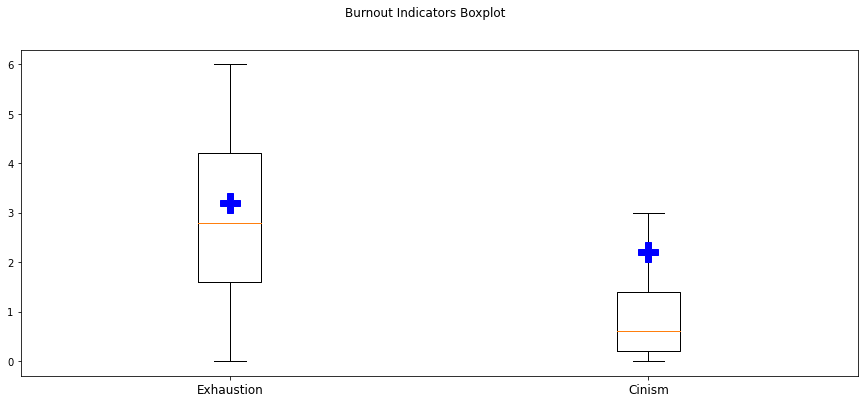

In [28]:
# fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
# axs[0].boxplot(df_features_pre_processed[_EXA_COL], 2)
# axs[1].boxplot(df_features_pre_processed[_CIN_COL])
# axs[2].boxplot(df_features_pre_processed[_ENG_COL])

data = [df_features_pre_processed[_EXA_COL], df_features_pre_processed[_CIN_COL]]
# Multiple box plots on one Axes
fig, ax = plt.subplots(figsize=(15, 6))

bpl = ax.boxplot(data, 0, '', patch_artist=False)
# ax.boxplot(data, 0)
ax.set_xticklabels(["Exhaustion", "Cinism"], fontsize=12)

plt.plot(1,_MIN_E,'bP', ms=20, zorder=10)
plt.plot(2,_MIN_C,'bP', ms=20)

# colors = ['lightblue', 'lightgreen', 'pink']

# for patch, color in zip(bpl['boxes'], colors):
    # patch.set_facecolor(color)


fig.suptitle('Burnout Indicators Boxplot')

plt.savefig('indicators_boxplot.png')

# plt.boxplot(df_features_pre_processed[_EXA_COL])
plt.show()

In [79]:
# df_features_imputed
# df_features_imputed.to_csv('dataset_filled.csv')

,Idade,Formação,Tempo_Escola,Tempo_profissão,Hrs_semanais,Numero_professores,Supervisiona,Licença_2semanas,Licença_ano,trab1,...,Populacao,PIB,IDHM,PIBPer,INVperc,Turma,Alunos,Professores,Investimento,TAMesc
0,38.0,2.0,5.0,13.0,40.0,36.0,1.0,1.0,1.0,7.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
1,53.0,1.0,9.0,15.0,20.0,36.0,2.0,1.0,1.0,6.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
2,52.0,2.0,17.0,25.0,20.0,36.0,1.0,1.0,2.0,7.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
3,40.0,2.0,1.0,18.0,20.0,36.0,1.0,1.0,1.0,7.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
4,42.0,1.0,2.0,18.0,20.0,36.0,1.0,1.0,3.0,6.0,...,9269.0,40999.970000,0.75700,4.420000,4620.6800,36.0,404.0,54.0,4.282908e+07,5.270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,37.0,2.0,5.0,14.0,20.0,14.0,1.3,1.0,1.0,7.0,...,49145.1,35843.555000,0.76130,3.682000,3884.4350,13.8,226.6,17.4,1.516057e+08,2.090
3966,28.0,1.0,5.0,5.0,20.0,1.0,1.0,1.0,2.0,7.0,...,75379.3,37852.875733,0.76716,1.842733,3499.2376,17.1,342.1,25.6,2.287794e+08,2.934
3967,25.0,2.0,1.0,5.0,44.0,13.5,1.0,1.0,1.0,7.0,...,174833.2,38811.871000,0.77310,0.375000,2970.7240,12.3,183.4,11.7,5.120372e+08,1.652
3968,39.0,2.0,14.0,20.0,20.0,53.0,2.0,1.0,1.0,7.0,...,61077.9,37040.628467,0.76232,1.572467,3398.8492,24.3,421.4,32.5,1.842243e+08,3.823


In [80]:
# Remova as colunas calculadas intermediárias, mantenha apenas as colunas que representam respostas diretas

trab_cols = ['trab'+str(i) for i in range(1, 33)]
atitrab_cols = ['atitrab'+str(i) for i in range(1, 21)]
be_cols = ['be'+str(i) for i in range(1, 20)]
bes_cols = ['bes'+str(i) for i in range(1, 6)]
saude_cols = ['saude'+str(i) for i in range(1, 5)]

df_filtered = df_features_imputed.drop(columns=trab_cols+atitrab_cols+be_cols+bes_cols+saude_cols+['Turma', 'Alunos', 'Professores', 'Numero_professores', 'Populacao', 'PIB', 'IDHM', 'PIBPer', 'INVperc', 'Investimento', 'Indiv'])

In [81]:
df_filtered.to_csv('dataset_filled_and_filtered.csv', index=False)

In [89]:
# df_filtered.columns
df_filtered[['MPS', 'IPPS', 'IOPS', 'ISP', 'CAFC', 'VSP', 'ARE', 'DED', 'ARS', 'AED', 'Engagement', 'Exaustao', 'Cinismo', 'SCV', 'Saude', 'TAMesc']].describe().loc['std', :]

MPS           0.723430
IPPS          0.968552
IOPS          1.317226
ISP           0.835682
CAFC          1.120464
VSP           0.995331
ARE           0.659675
DED           0.897505
ARS           0.893858
AED           0.814700
Engagement    0.946452
Exaustao      1.648369
Cinismo       1.251582
SCV           1.224491
Saude         1.357280
TAMesc        1.917103
Name: std, dtype: float64

# Checkpoint V1 - pré-processamento

1. Definir valores NA "#NULO!" (ok)
2. Unificar colunas e linhas (ok)
3. Converter valores numéricos com vírgula para ponto (ok)
4. Transformar valores descritivos em categóricos com códigos (ok)
5. Dropar colunas/linhas com NA que não irão auxiliar (ok)
6. Preencher valores NA de colunas mantidas (ok)
7. Transformar colunas descritivas em categoria (radicais de palavras, centralizar problemas) (ok, manual)

# Checkpoint V1 - predição

### Exaustão: baixa (< 2,0) média (2,1 a 3,19) alta (> 3,2)
### Cinismo: baixa (< 1,0) média (1,11 a 2,1) alta (> 2,2)
### Engajamento: baixa (< 4,0) média (4,01 a 4,99) alta (> 5)

* 1. Determinar a classificação dos indivíduos com diferentes hipóteses
* 1.1. Com Exaustao e Cinismo abaixo da média e Engagement acima da média
* 1.2. Com Exaustão ou Cinismo altos (abaixo da média)
* 1.3. Com qualquer um dos escores altos
* 2. Selecionar método de classificação
* 3. Aferir a qualidade e realizar comparações
* 4. Plotar gráficos de resultados